In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/fastcampus/이커머스

/content/drive/MyDrive/fastcampus/이커머스


In [3]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
plt.style.use(["seaborn-white"])
import seaborn

df = pd.read_csv("advertising.csv")
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0


In [4]:
df["Clicked on Ad"].value_counts(normalize=True)

1    0.5
0    0.5
Name: Clicked on Ad, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


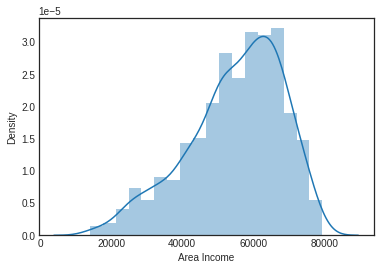

In [7]:
import seaborn as sns
sns.distplot(df["Area Income"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


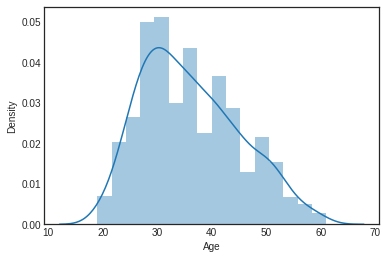

In [8]:
sns.distplot(df["Age"]);

In [9]:
df["Country"].nunique(),df["City"].nunique(),df["Ad Topic Line"].nunique()

(237, 969, 1000)

In [10]:
df.isna().sum()/len(df)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

결측치 처리 방법  
제거하는 방법
fill하는 방법 
그대로 두는 방법 
결측치가 있는 상태에서 머신러닝이 

In [13]:
round(df["Age"].mean())

36

In [16]:
df = df.fillna(round(df["Age"].mean()))
df.isna().sum()/len(df)

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

In [19]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

X = df[['Daily Time Spent on Site', 'Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# 스케일된 데이터에 한하여, coef_의 절대값이 클수록 model에 중요한 변수
model.coef_

array([[-5.75717479e-02,  2.67089506e-01, -1.53434593e-05,
        -2.74079158e-02,  1.78635821e-03]])

In [30]:
y_pred = model.predict(X_test)

200

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9

In [32]:
confusion_matrix(y_test, y_pred)

array([[85,  4],
       [16, 95]])